In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import librosa

In [3]:

Tess = r"M:\Final year project\JPPY2213-Speech Emotion Recognition using Machine\JPPY2213-Speech Emotion Recognition using Machine\SOURCE CODE\audio detection\model\Speech Emotion Dataset/"


In [4]:
Tess

'M:\\Final year project\\JPPY2213-Speech Emotion Recognition using Machine\\JPPY2213-Speech Emotion Recognition using Machine\\SOURCE CODE\\audio detection\\model\\Speech Emotion Dataset/'

In [5]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,M:\Final year project\JPPY2213-Speech Emotion ...
1,angry,M:\Final year project\JPPY2213-Speech Emotion ...
2,angry,M:\Final year project\JPPY2213-Speech Emotion ...
3,angry,M:\Final year project\JPPY2213-Speech Emotion ...
4,angry,M:\Final year project\JPPY2213-Speech Emotion ...


In [6]:
Tess_df['Emotions'].value_counts()

angry       403
happy       402
disgust     401
fear        401
neutral     400
surprise    400
sad         400
Name: Emotions, dtype: int64

In [7]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [8]:
!pip3 install resampy



[notice] A new release of pip is available: 23.1.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(Tess_df.iterrows()):
    file_name = os.path.join(os.path.abspath(Tess),str(row["Path"]))
    final_class_labels=row["Emotions"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

2807it [02:45, 16.98it/s]


In [9]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['Path','Emotions'])
extracted_features_df.head()
# Storing the dataframe to pickle for further processing
extracted_features_df.to_pickle("extracted_df.pkl")
extracted_features_df.head()

,Path,Emotions
0,"[-386.65387, 57.02423, -22.126987, -7.373469, ...",angry
1,"[-99.995834, 111.12272, -32.330944, 17.878746,...",angry
2,"[-447.8823, 70.02029, -7.251139, -15.752107, -...",angry
3,"[-406.17514, 31.89866, -10.602405, 5.086764, -...",angry
4,"[-387.20657, 57.649464, -16.744614, -8.857875,...",angry


In [10]:
final = pd.read_pickle("./extracted_df.pkl")
X = np.array(final["Path"].tolist())
y = np.array(final["Emotions"].tolist())
print(X)
print(y)

[[-3.8665387e+02  5.7024231e+01 -2.2126987e+01 ...  7.4928312e+00
   3.0416687e+00 -3.1780646e+00]
 [-9.9995834e+01  1.1112272e+02 -3.2330944e+01 ... -2.4465530e+00
  -4.5736115e-02  6.9233334e-01]
 [-4.4788229e+02  7.0020287e+01 -7.2511392e+00 ...  8.5472670e+00
   3.5690718e+00 -8.8721639e-01]
 ...
 [-3.7526379e+02  7.2433640e+01  3.1662104e+01 ...  3.4386234e+00
   4.4365230e+00  3.5771644e+00]
 [-4.2672800e+02  7.4208549e+01  2.4606394e+01 ...  7.2482071e+00
   1.0590129e+01  7.7258043e+00]
 [-4.1441348e+02  6.0110760e+01  2.6068558e+01 ...  2.6750808e+00
   5.4071159e+00  3.5427551e+00]]
['angry' 'angry' 'angry' ... 'sad' 'sad' 'sad']


In [11]:
        import IPython.display as ipd
        import librosa
        import librosa.display
        import pandas as pd
        import os, time, warnings
        import seaborn as sns
        import numpy as np
        from tqdm import tqdm
        import matplotlib.pyplot as plt
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import LabelEncoder
        from tensorflow.keras.utils import to_categorical
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import (
            Dense,
            Conv1D,
            MaxPooling1D,
            BatchNormalization,
            Dropout, 
            Flatten,
            Conv2D,
            MaxPool2D,
        )

In [12]:
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))
Y.shape

(2807, 7)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])


Number of training samples =  2526
Number of testing samples =  281


In [14]:

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(40,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              41000     
                                                                 
 dense_1 (Dense)             (None, 750)               750750    
                                                                 
 dense_2 (Dense)             (None, 500)               375500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 100)               25100     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 7)                 3

In [15]:
ANN_Model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [16]:
num_epochs = 100
num_batch_size = 32

t0 = time.time()

history = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")


Epoch 1/100
79/79 [==============================] - 6s 39ms/step - loss: 2.5557 - accuracy: 0.4161 - val_loss: 0.6151 - val_accuracy: 0.8256
Epoch 2/100
79/79 [==============================] - 3s 33ms/step - loss: 0.4102 - accuracy: 0.8579 - val_loss: 0.1556 - val_accuracy: 0.9502
Epoch 3/100
79/79 [==============================] - 2s 32ms/step - loss: 0.2262 - accuracy: 0.9244 - val_loss: 0.1411 - val_accuracy: 0.9466
Epoch 4/100
79/79 [==============================] - 2s 31ms/step - loss: 0.1200 - accuracy: 0.9592 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 5/100
79/79 [==============================] - 3s 32ms/step - loss: 0.0976 - accuracy: 0.9691 - val_loss: 0.0598 - val_accuracy: 0.9751
Epoch 6/100
79/79 [==============================] - 3s 34ms/step - loss: 0.0460 - accuracy: 0.9822 - val_loss: 0.0333 - val_accuracy: 0.9822
Epoch 7/100
79/79 [==============================] - 2s 30ms/step - loss: 0.0339 - accuracy: 0.9889 - val_loss: 0.0591 - val_accuracy: 0.9751
Epoch 

79/79 [==============================] - 2s 30ms/step - loss: 3.8150e-07 - accuracy: 1.0000 - val_loss: 2.4842e-04 - val_accuracy: 1.0000
Epoch 58/100
79/79 [==============================] - 2s 31ms/step - loss: 3.7385e-07 - accuracy: 1.0000 - val_loss: 3.2939e-04 - val_accuracy: 1.0000
Epoch 59/100
79/79 [==============================] - 2s 30ms/step - loss: 3.3483e-07 - accuracy: 1.0000 - val_loss: 3.0926e-04 - val_accuracy: 1.0000
Epoch 60/100
79/79 [==============================] - 2s 30ms/step - loss: 3.1477e-07 - accuracy: 1.0000 - val_loss: 2.3484e-04 - val_accuracy: 1.0000
Epoch 61/100
79/79 [==============================] - 2s 30ms/step - loss: 2.9755e-07 - accuracy: 1.0000 - val_loss: 3.0388e-04 - val_accuracy: 1.0000
Epoch 62/100
79/79 [==============================] - 2s 30ms/step - loss: 2.6829e-07 - accuracy: 1.0000 - val_loss: 2.5127e-04 - val_accuracy: 1.0000
Epoch 63/100
79/79 [==============================] - 2s 30ms/step - loss: 2.5380e-07 - accuracy: 1.0000 - 

C:\Users\PRITESH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


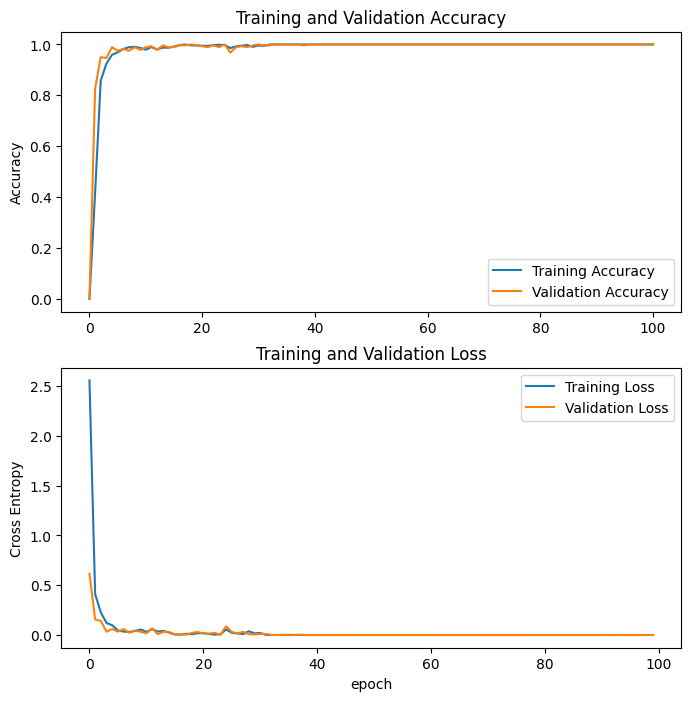

In [17]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [18]:
emotion_names=extracted_features_df['Emotions'].unique()
emotion_names

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

In [19]:
y_pred = ANN_Model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

9/9 [==============================] - 0s 9ms/step


array([4, 5, 0, 6, 2, 3, 0, 0, 4, 5, 4, 4, 6, 1, 2, 4, 0, 1, 5, 4, 2, 0,
       3, 4, 4, 0, 2, 2, 3, 1, 2, 2, 4, 2, 3, 0, 4, 6, 2, 1, 2, 6, 5, 4,
       6, 0, 6, 3, 1, 6, 2, 1, 3, 5, 1, 3, 1, 4, 3, 6, 4, 1, 0, 6, 5, 0,
       6, 0, 4, 0, 1, 1, 3, 4, 2, 0, 1, 4, 1, 1, 0, 6, 0, 5, 0, 2, 3, 1,
       5, 4, 1, 5, 5, 5, 0, 6, 5, 4, 3, 4, 1, 2, 0, 2, 6, 5, 1, 1, 4, 2,
       3, 2, 4, 3, 1, 2, 0, 1, 4, 6, 3, 0, 1, 0, 3, 6, 6, 6, 2, 2, 1, 3,
       6, 5, 0, 3, 0, 6, 0, 5, 2, 0, 1, 0, 1, 0, 5, 0, 2, 4, 2, 3, 2, 5,
       1, 3, 6, 2, 4, 2, 5, 5, 5, 3, 5, 2, 0, 4, 0, 0, 3, 1, 4, 2, 5, 4,
       3, 2, 0, 2, 0, 3, 5, 1, 2, 1, 4, 4, 5, 5, 2, 4, 2, 0, 1, 4, 6, 6,
       0, 2, 1, 4, 2, 1, 4, 0, 5, 3, 1, 0, 3, 0, 6, 2, 5, 2, 0, 3, 0, 1,
       1, 4, 2, 5, 2, 5, 5, 3, 2, 6, 4, 0, 5, 0, 4, 6, 5, 3, 3, 3, 3, 5,
       4, 1, 4, 5, 5, 1, 4, 4, 2, 4, 5, 3, 6, 6, 1, 4, 2, 1, 2, 5, 3, 4,
       3, 1, 1, 6, 2, 0, 4, 4, 2, 2, 5, 2, 5, 0, 2, 1, 6], dtype=int64)

In [20]:
y_check=np.argmax(y_test,axis=1)
y_check

array([4, 5, 0, 6, 2, 3, 0, 0, 4, 5, 4, 4, 6, 1, 2, 4, 0, 1, 5, 4, 2, 0,
       3, 4, 4, 0, 2, 2, 3, 1, 2, 2, 4, 2, 3, 0, 4, 6, 2, 1, 2, 6, 5, 4,
       6, 0, 6, 3, 1, 6, 2, 1, 3, 5, 1, 3, 1, 4, 3, 6, 4, 1, 0, 6, 5, 0,
       6, 0, 4, 0, 1, 1, 3, 4, 2, 0, 1, 4, 1, 1, 0, 6, 0, 5, 0, 2, 3, 1,
       5, 4, 1, 5, 5, 5, 0, 6, 5, 4, 3, 4, 1, 2, 0, 2, 6, 5, 1, 1, 4, 2,
       3, 2, 4, 3, 1, 2, 0, 1, 4, 6, 3, 0, 1, 0, 3, 6, 6, 6, 2, 2, 1, 3,
       6, 5, 0, 3, 0, 6, 0, 5, 2, 0, 1, 0, 1, 0, 5, 0, 2, 4, 2, 3, 2, 5,
       1, 3, 6, 2, 4, 2, 5, 5, 5, 3, 5, 2, 0, 4, 0, 0, 3, 1, 4, 2, 5, 4,
       3, 2, 0, 2, 0, 3, 5, 1, 2, 1, 4, 4, 5, 5, 2, 4, 2, 0, 1, 4, 6, 6,
       0, 2, 1, 4, 2, 1, 4, 0, 5, 3, 1, 0, 3, 0, 6, 2, 5, 2, 0, 3, 0, 1,
       1, 4, 2, 5, 2, 5, 5, 3, 2, 6, 4, 0, 5, 0, 4, 6, 5, 3, 3, 3, 3, 5,
       4, 1, 4, 5, 5, 1, 4, 4, 2, 4, 5, 3, 6, 6, 1, 4, 2, 1, 2, 5, 3, 4,
       3, 1, 1, 6, 2, 0, 4, 4, 2, 2, 5, 2, 5, 0, 2, 1, 6], dtype=int64)

In [21]:
loss,accuracy=ANN_Model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 5.479307583300397e-05
Test Accuracy: 1.0


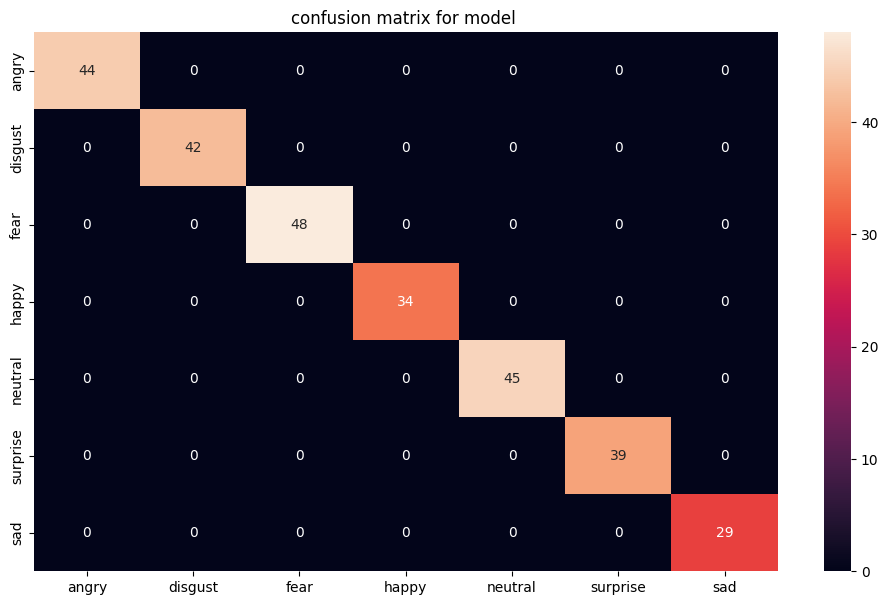

In [23]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

       angry       1.00      1.00      1.00        44
     disgust       1.00      1.00      1.00        42
        fear       1.00      1.00      1.00        48
       happy       1.00      1.00      1.00        34
     neutral       1.00      1.00      1.00        45
    surprise       1.00      1.00      1.00        39
         sad       1.00      1.00      1.00        29

    accuracy                           1.00       281
   macro avg       1.00      1.00      1.00       281
weighted avg       1.00      1.00      1.00       281

